# Box Office Success Analysis

## Overview

The project analysis goal is to provide insights to Microsoft for a new movie studio on what types of films are currently successful at the box office. I will analyze a movie dataset from [The Movie Data Base](https://www.themoviedb.org/) website to identify key trends and patterns, ultimately providing actionable recommendations. Microsoft can use this analysis to decide on what type of film to create.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I will explore what types of films are currently doing the best at the box office. I will then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. Objectives:
- Identify genres that are performing well at the box office.
- Determine key attributes associated with successful films.
- Provide three actionable recommendations for the new movie studio.

## Data Understanding

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Setting %matplotlib inline so the graphs will display immediately below the cell that creates them
%matplotlib inline

In [2]:
#Loading and previewing the movie dataset
#Including index_col=0 in order to avoid creating an extra Id column
df = pd.read_csv('tmdb.movies.csv', index_col=0)
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


### Checking the data

In [3]:
# Previewing the top of our dataset
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
# Previewing the bottom of our dataset
df.tail()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [5]:
# Checking if columns are named appropriately
df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [6]:
# Checking the shape of the data
df.shape

(26517, 9)

In [7]:
# Checking on the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [8]:
# Checking the structure of the dataset to identify anomalies
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [9]:
# Checking for missing values
df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

## Data Preparation
### Data Cleaning
Here, I'm making the data easier to work with by dropping any duplicate values in the dataset.

In [10]:
# Checking for duplicates
df.duplicated().sum()

1020

In [11]:
df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

Expected output is that of a boolean data type where, <b>'False'</b> represents non-duplicate values while <b>'True'</b> represents duplicate values. Seeing as the number of duplicates is not high, I'll drop them from the dataset.

In [12]:
# Remove duplicates
df = df.drop_duplicates()
df.shape

(25497, 9)

Confirming that all duplicates have been dropped.

In [13]:
# Rechecking for duplicates
df.duplicated().value_counts()

False    25497
dtype: int64

From this output, duplicates are no longer present since only <b>False</b> is outputed.

## Distribution of Numerical Columns
Looking at the distribution of the dataset's numeric columns.

In [14]:
# Checking for unique values
df.nunique()

genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

### 1. Distribution of Popularity

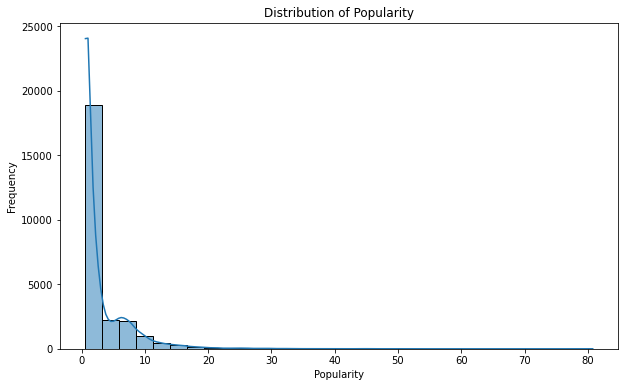

In [15]:
# Plot the distribution of 'popularity'
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

<b>Explanation:</b>

- Purpose: This plot visualizes the distribution of the 'popularity' scores of movies in the dataset.
- X-axis (Popularity): Represents the popularity score of movies.
- Y-axis (Frequency): Represents the number of movies that fall within each popularity score bin.

<b>Observation:</b> The majority of the movies have low popularity scores, as indicated by the high frequency on the left side of the plot. The distribution is heavily right-skewed, with a long tail extending towards higher popularity scores. This suggests that while most movies have low popularity scores, a few movies achieve very high popularity.

### 2. Distribution of Vote Average

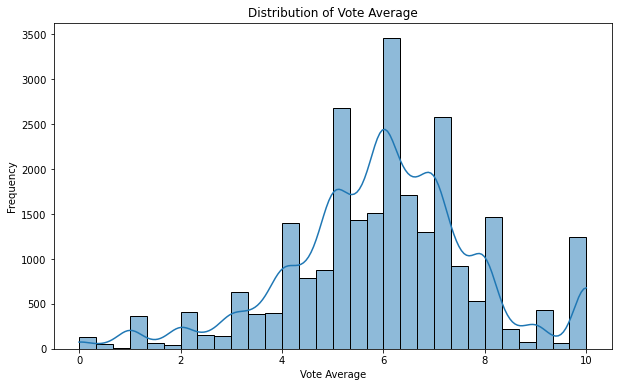

In [16]:
# Plot the distribution of 'vote_average'
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=30, kde=True)
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

<b>Explanation:</b>

- Purpose: This plot visualizes the distribution of average vote ratings given to movies.
- X-axis (Vote Average): Represents the average vote rating of movies, which typically ranges from 0 to 10.
- Y-axis (Frequency): Represents the number of movies that fall within each vote average bin.

<b>Observation:</b> The vote averages form a roughly normal distribution, peaking around a vote average of 6-7. This indicates that most movies are rated around this mid-point. There are fewer movies with very low (0-2) or very high (9-10) ratings.

### 3. Distribution of Vote Count

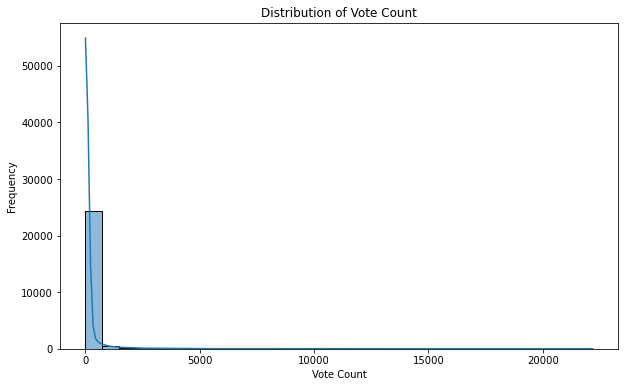

In [17]:
# Plot the distribution of 'vote_count'
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_count'], bins=30, kde=True)
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

<b>Explanation:</b>

- Purpose: This plot visualizes the distribution of the number of votes received by movies.
- X-axis (Vote Count): Represents the number of votes a movie has received.
- Y-axis (Frequency): Represents the number of movies that fall within each vote count bin.

<b>Observation:</b> Similar to the 'popularity' plot, the distribution of vote counts is heavily right-skewed. Most movies have received a low number of votes, as shown by the high frequency on the left side of the plot. A small number of movies have received a very high number of votes, which is represented by the long tail to the right.

In summary, the three bar plots illustrate key characteristics of the movie dataset:
- Popularity: Most movies have low popularity scores with a few movies standing out with very high popularity.
- Vote Average: The average movie rating tends to center around 6-7, indicating a general trend towards moderate ratings.
- Vote Count: The majority of movies receive a low number of votes, while a select few garner a significant number of votes, showing that audience engagement is highly concentrated.

These visualizations help to understand the general trends and outliers in movie ratings and popularity, providing insights that can guide strategic decisions for creating content that aligns with popular and highly-rated movies.

### Distribution of Categorical Columns
Looking at the distribution of the dataset's categorical columns.

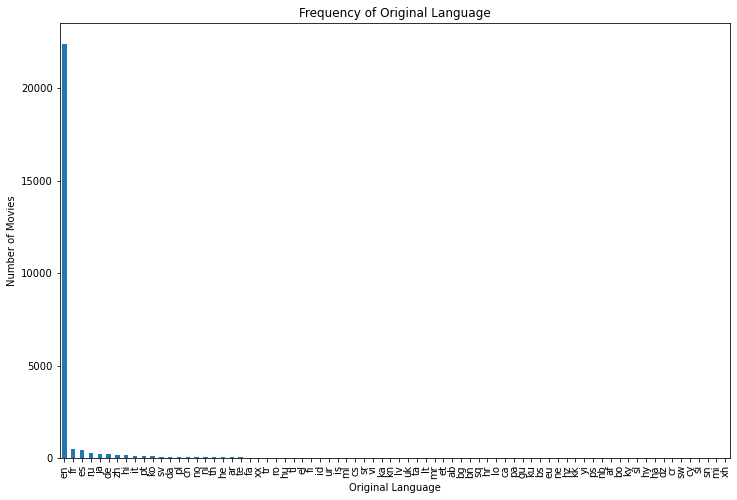

In [18]:
# Analyze the frequency distribution of 'original_language'
plt.figure(figsize=(12, 8))
df['original_language'].value_counts().plot(kind='bar')
plt.title('Frequency of Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.show()

<b>Explanation:</b>
- Purpose: This plot visualizes the distribution of original languages across movies.
- X-axis (Original Language): Represents the original languages used in the movies.
- Y-axis (Number of Movies): Represents the number of movies produced in each language.

<b>Observation:</b> The tallest bar corresponds to the most common language <b>English</b>, while the shorter bars represent less common languages. This visualization provides insights into language diversity in the film industry.

### Data Analysis

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


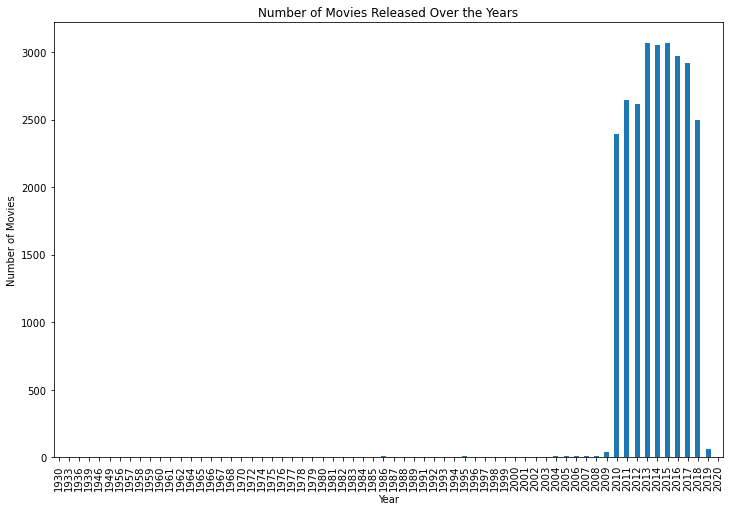

In [26]:
# Convert 'release_date' to datetime
df.loc[:, 'release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract year from the release date
df.loc[:, 'release_year'] = df['release_date'].dt.year

# Analyze the number of movies released over the years
plt.figure(figsize=(12, 8))
df['release_year'].value_counts().sort_index().plot(kind='bar')

plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

<b>Explanation:</b>
- Purpose: This plot provides a visual representation of the trend in movie releases over the years.
- X-axis (Year): Represents the years.
- Y-axis (Number of movies): Represents the number of movies released per year.

<b>Observation:</b> There is a noticeable increase in the number of movies released in the later years. Which is indicative of the growth of the film industry over time. This backs's up Microsoft's observation and clearly illustrates movie production will yield a greater reach and success.

### Correlation Analysis
I used a correlation heatmap to graphical representation how closely related the different variables are within the dataset.
- Darker colors represent stronger correlations.
- Lighter colors indicate weaker correlations.

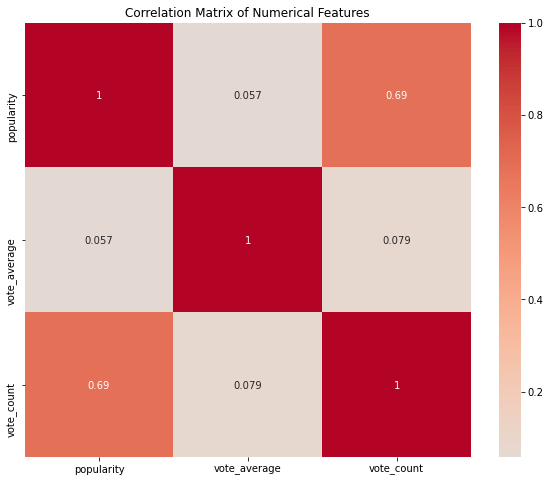

In [31]:
# Calculate the correlation matrix
correlation_matrix = df[['popularity', 'vote_average', 'vote_count']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<b>Explanation</b>
The heatmap generated shows the correlation matrix for three numerical features: ‘popularity’, ‘vote_average’, and ‘vote_count’.
Analyzing the specific correlations:
- ‘popularity’ and ‘vote_count’ have a high positive correlation of approximately 0.69 (indicated by a darker shade).
- Both ‘popularity’ and ‘vote_count’ have very low positive correlations with ‘vote_average’, as shown by their respective coefficients of 0.057 and 0.079 (represented by much lighter shades).

### Top Movies by Popularity and Votes
#### 1. Top Movies by Popularity 

In [28]:
# Top 10 movies by popularity
top_popular_movies = df[['title', 'popularity']].sort_values(by='popularity', ascending=False).head(10)
print(top_popular_movies)

                                             title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057
20618                       Spider-Man: Homecoming      46.775


#### 2. Top Movies by Vote Average

In [29]:
# Top 10 movies by vote average
top_rated_movies = df[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(10)
print(top_rated_movies)

                                title  vote_average
12835        OJ: Trial of the Century          10.0
16532                  Psychoacoustic          10.0
16521                      Afterimage          10.0
16522                          Healed          10.0
16523                        SelectED          10.0
16524                       No Charge          10.0
16525                 If I Could Talk          10.0
16526           I've Always Been Here          10.0
16527  Dear Sofia: A Royal Collection          10.0
16528          Black Water Wilderness          10.0


#### 3. Top Movies by Vote Count

In [30]:
# Top 10 movies by vote count
top_voted_movies = df[['title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(10)
print(top_voted_movies)

                         title  vote_count
4                    Inception       22186
17383                 Deadpool       20175
5179              The Avengers       19673
6                       Avatar       18676
11032             Interstellar       18597
11021  Guardians of the Galaxy       17958
5189          Django Unchained       15725
5235          The Hunger Games       14587
14177       Mad Max: Fury Road       14454
7881                Iron Man 3       14155


### Conclusions